In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats

In [3]:
hmc0 = np.genfromtxt('hmc-chains/hmc_chain0_full.txt.gz')
hmc1 = np.genfromtxt('hmc-chains/hmc_chain1_full.txt.gz')
hmc = np.vstack((hmc0, hmc1))

In [4]:
cob0 = np.genfromtxt('hmc-chains/mh_cob.1.txt.gz')
cob1 = np.genfromtxt('hmc-chains/mh_cob.2.txt.gz')
cob = np.vstack((cob0, cob1))

In [5]:
names = [
"sigma8",
"Omega_c",
"Omega_b",
"h",
"n_s",
"w0",
"m1",
"m2",
"m3",
"m4",
"dz1",
"dz2",
"dz3",
"dz4",
"A",
"eta",
"bias1",
"bias2",
"bias3",
"bias4",
"bias5",
]

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


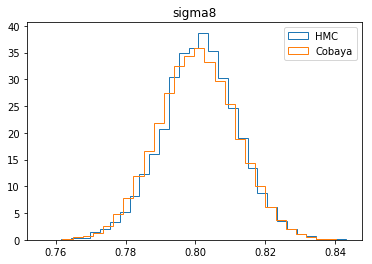

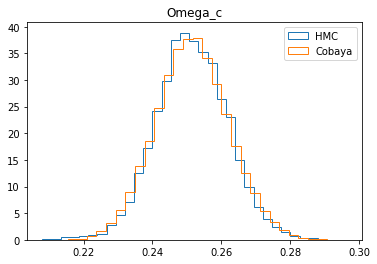

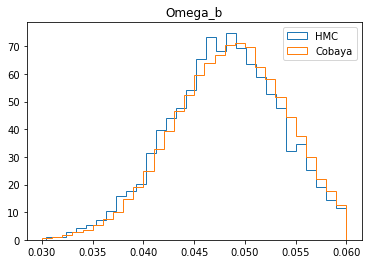

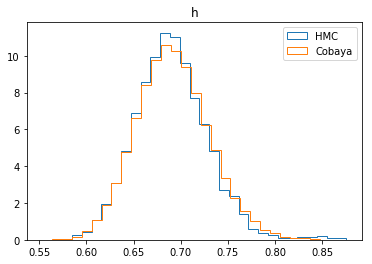

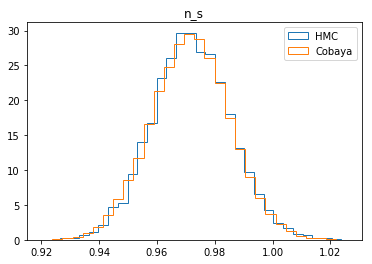

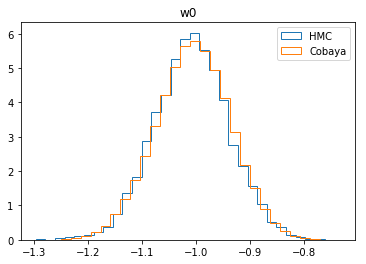

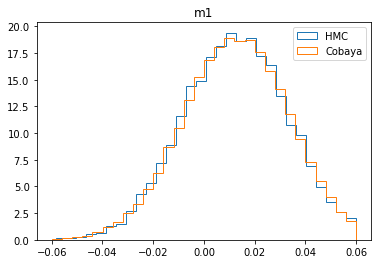

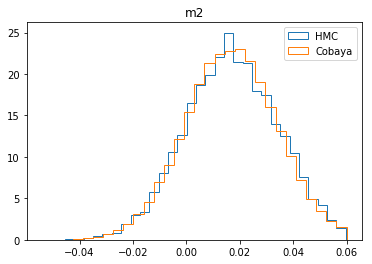

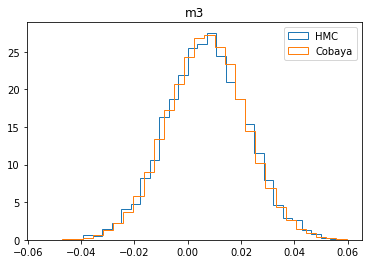

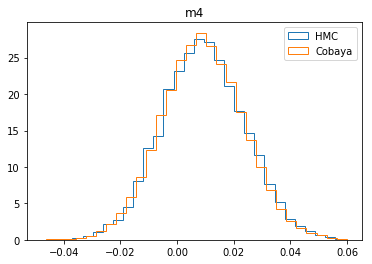

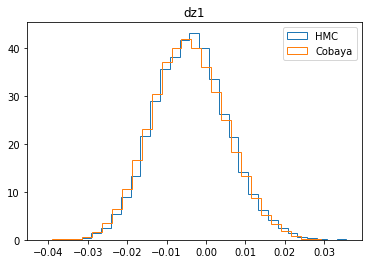

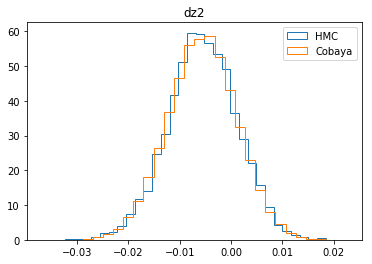

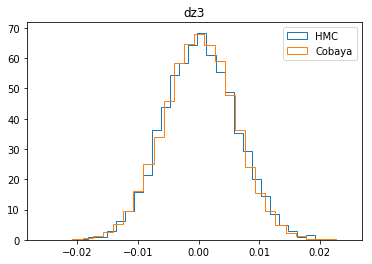

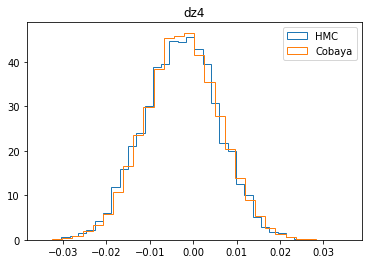

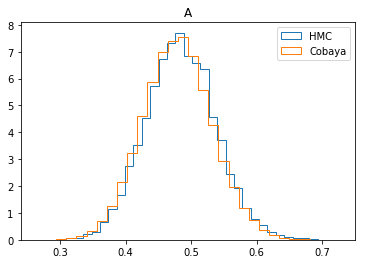

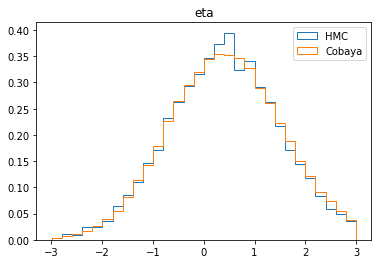

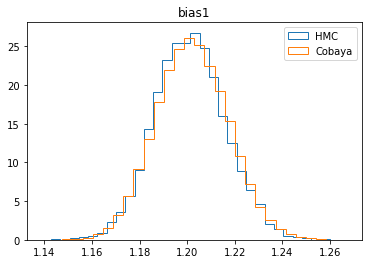

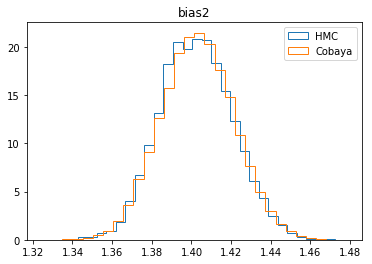

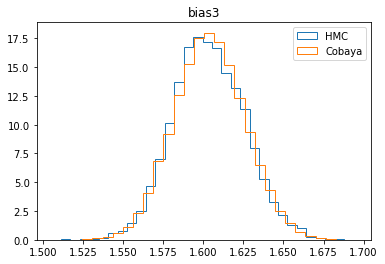

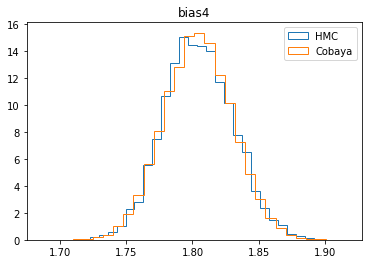

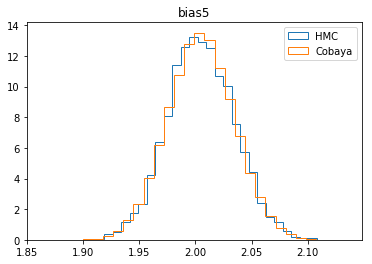

In [6]:
for i, name in enumerate(names):
    plt.figure()
    plt.hist(hmc[:, i], bins=30, histtype='step', density=1, label='HMC')
    plt.hist(cob[:, i+2], weights=cob[:,0], bins=30, histtype='step', density=1, label='Cobaya')
    plt.legend()
    plt.title(name)

In [7]:
cob_omm = cob[:, 3] + cob[:, 4]
hmc_omm = hmc[:, 1] + hmc[:, 2]
cob_s8 = cob[:, 2] * (cob_omm / 0.3)**0.5
hmc_s8 = hmc[:, 0] * (hmc_omm / 0.3)**0.5

cob_3param = np.vstack([cob_omm, cob_s8, cob[:, 7]])
hmc_3param = np.vstack([hmc_omm, hmc_s8, hmc[:, 5]])

cob_om_s8 = np.vstack([cob_omm, cob_s8])
cob_om_w = np.vstack([cob_omm, cob[:, 7]])
cob_s8_w = np.vstack([cob_s8, cob[:, 7]])

hmc_om_s8 = np.vstack([hmc_omm, hmc_s8])
hmc_om_w = np.vstack([hmc_omm, hmc[:, 5]])
hmc_s8_w = np.vstack([hmc_s8, hmc[:, 5]])

hmc_w = hmc[:, 5]
cob_w = cob[:, 7]


hmc_sig8 = hmc[:, 0]
cob_sig8 = cob[:, 2]

In [8]:
def plot_contours(ax, x_hmc, y_hmc, x_cob, y_cob, xmin, xmax, ymin, ymax, xname, yname):
    hmc_xy = np.vstack([x_hmc, y_hmc])
    cob_xy = np.vstack([x_cob, y_cob])

    kde_hmc = scipy.stats.gaussian_kde(hmc_xy,)
    kde_cob = scipy.stats.gaussian_kde(cob_xy, weights=cob[:,0])
    y_grid, x_grid = np.mgrid[ymin:ymax:40j, xmin:xmax:40j]

    points = np.vstack([x_grid.flatten(), y_grid.flatten()])
    L_hmc = kde_hmc.evaluate(points).reshape(x_grid.shape)
    L_cob = kde_cob.evaluate(points).reshape(x_grid.shape)    

    x = np.sort(L_hmc.flatten())
    y = np.cumsum(x)
    lim1_hmc = x[np.where(y > y[-1] * 0.05)[0][0]]
    lim2_hmc = x[np.where(y > y[-1] * 0.32)[0][0]]

    x = np.sort(L_cob.flatten())
    y = np.cumsum(x)
    lim1_cob = x[np.where(y > y[-1] * 0.05)[0][0]]
    lim2_cob = x[np.where(y > y[-1] * 0.32)[0][0]]

    lines1 = ax.contour(L_hmc, levels=[lim1_hmc, lim2_hmc, L_hmc.max()*1.1], extent=[xmin, xmax, ymin, ymax], colors=['#1f77bf'])
    lines2 = ax.contour(L_cob, levels=[lim1_cob, lim2_cob, L_cob.max()*1.1], extent=[xmin, xmax, ymin, ymax], colors=['#ff7f0e'])
    return lines1, lines2
    

In [9]:
plt.rc('font', family='serif')
plt.rc('font', size='12')
matplotlib.rcParams["xtick.direction"]='in'
matplotlib.rcParams["ytick.direction"]='in'

matplotlib.rcParams["xtick.major.size"]=10
matplotlib.rcParams["ytick.major.size"]=10

matplotlib.rcParams["xtick.minor.size"]=5
matplotlib.rcParams["ytick.minor.size"]=5


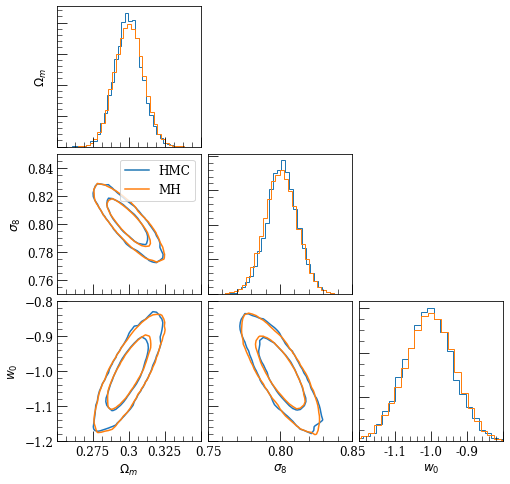

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
ax = axes[0,0]
ax.hist(hmc_omm, bins=30, histtype='step', density=1, label='HMC')
ax.hist(cob_omm, weights=cob[:,0], bins=30, histtype='step', density=1, label='MH')
ax.set_xlim(0.25, 0.35)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.minorticks_on()
ax.set_ylabel("$\Omega_m$")

ax = axes[(1,1)]
ax.hist(hmc_sig8, bins=30, histtype='step', density=1)
ax.hist(cob_sig8, weights=cob[:,0], bins=30, histtype='step', density=1)
ax.set_xlim(0.75, 0.85)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.minorticks_on()

ax = axes[2,2]
ax.hist(hmc_w, bins=30, histtype='step', density=1)
ax.hist(cob_w, weights=cob[:,0], bins=30, histtype='step', density=1)
ax.set_xlim(-1.2, -0.8)
ax.set_yticklabels([])
ax.minorticks_on()
ax.set_xlabel("$w_0$")

ax = axes[1, 0]
plot_contours(ax, hmc_omm, hmc_sig8, cob_omm, cob_sig8, 0.25, 0.35, 0.75, 0.85, "$\Omega_m$", r"$\sigma_8$")
ax.set_xticklabels([])
ax.minorticks_on()
ax.set_ylabel("$\sigma_8$")

lines = [
    matplotlib.lines.Line2D([], [], color=u'#1f77b4', label='HMC'),
    matplotlib.lines.Line2D([], [], color=u'#ff7f0e', label='MH')

]
ax.legend(handles=lines, fontsize=12)

ax = axes[2, 0]
plot_contours(ax, hmc_omm, hmc_w, cob_omm, cob_w, 0.25, 0.35, -1.2, -0.8, "$\Omega_m$", "$w_0$")
ax.minorticks_on()
ax.set_xlabel("$\Omega_m$")
ax.set_ylabel("$w_0$")

ax = axes[2, 1]
plot_contours(ax, hmc_sig8, hmc_w, cob_sig8, cob_w, 0.75, 0.85, -1.2, -0.8, r"$\sigma_8$", "$w_0$")
ax.set_yticklabels([])
ax.minorticks_on()
ax.set_xlabel("$\sigma_8$")

ax = axes[1,2]
fig.delaxes(ax)
ax = axes[0,2]
fig.delaxes(ax)
ax = axes[0,1]
fig.delaxes(ax)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
fig.canvas.draw()

axes[2,0].set_xticklabels(["", "0.275", "0.3", "0.325", ""])
# axes[2,1].set_xticklabels([""] + [a.get_text() for a in axes[2,1].get_xticklabels()[1:]])
axes[2,2].set_xticklabels(["", "-1.1", "-1.0", "-0.9", ""])
fig.savefig('hmc.pdf')